In [6]:
%matplotlib inline
import numpy as np
from matplotlib import pylab
import matplotlib.pyplot as plt
import seaborn

class Relu():

    def __init__(self, n_coefficients=9, domain=(-100, 100)):
        self.cache = None
        self.coeff = self.compute_coefficients_relu(n_coefficients, domain)
        self.coeff_dir = np.multiply(self.coeff, range(len(self.coeff))[::-1])[:-1]

    def initialize(self):
        pass

    def forward(self, x):
        x_powers = np.array([x ** i for i in range(len(self.coeff))][::-1]).T
        y = x_powers.dot(self.coeff)
        self.cache = x_powers[:,1:]
        return y

    def backward(self, d_y, learning_rate):
        x_powers = self.cache
        d_x = d_y * x_powers.dot(self.coeff_dir)
        return d_x
    
    def relu_dir(self, x):
        x_powers = np.array([x ** i for i in range(len(self.coeff)-1)][::-1]).T
        y = x_powers.dot(self.coeff_dir)
        return y
    
    @staticmethod
    def compute_coefficients_relu(n_coefficients, domain):
        assert domain[0] < 0 < domain[1]
        x = list(range(domain[0], domain[1]))
        y = [0] * abs(domain[0]) + list(range(0, domain[1]))
        return np.polyfit(x, y, n_coefficients)

              
relu_layer = Relu(n_coefficients=9, domain=(-10, 10))
x = np.arange(-10,11)
y = relu_layer.forward(x)

In [14]:
def poly_approx(x, coefficients): 
    return sum([coefficient * x ** (len(coefficients) - 1 - i) for i, coefficient in enumerate(coefficients)])

    
def compute_coefficients_ReLU(n_coefficients, domain=(-100, 100)):
    assert domain[0] < 0 < domain[1]
    x = list(range(domain[0], domain[1]))
    y = [0] * abs(domain[0]) + list(range(0, domain[1]))
    return np.polyfit(x, y, n_coefficients), x, y


def plot_ReLU(coefficients, x, y):
    ReLU = np.poly1d(coefficients)
    x_new = np.linspace(x[0], x[-1], 50)
    y_new = ReLU(x_new)

    pylab.rcParams['figure.figsize'] = (15, 10)
    plt.plot(x,y, x_new, y_new)
    pylab.title('Coefficients: {}'.format(len(coefficients)-1))
    ax = plt.gca()
    fig = plt.gcf()
    
coefficients, x, y = compute_coefficients_ReLU(9, (-300, 300))

/home/koen/anaconda2/envs/openmined/lib/python3.6/site-packages/ipykernel/__main__.py:9: RankWarning: Polyfit may be poorly conditioned


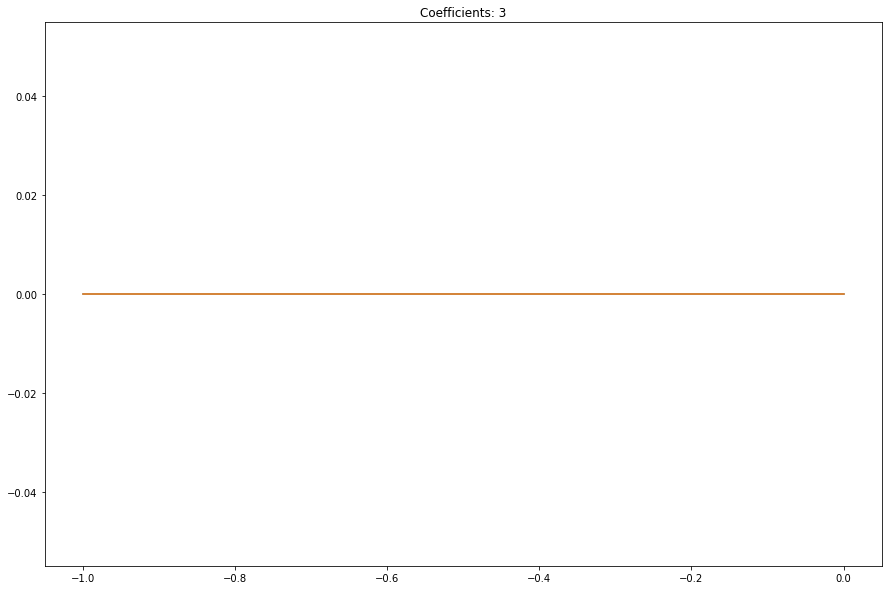

In [15]:
coefficients, x, y = compute_coefficients_ReLU(3, (-1, 1))   
plot_ReLU(coefficients, x, y)

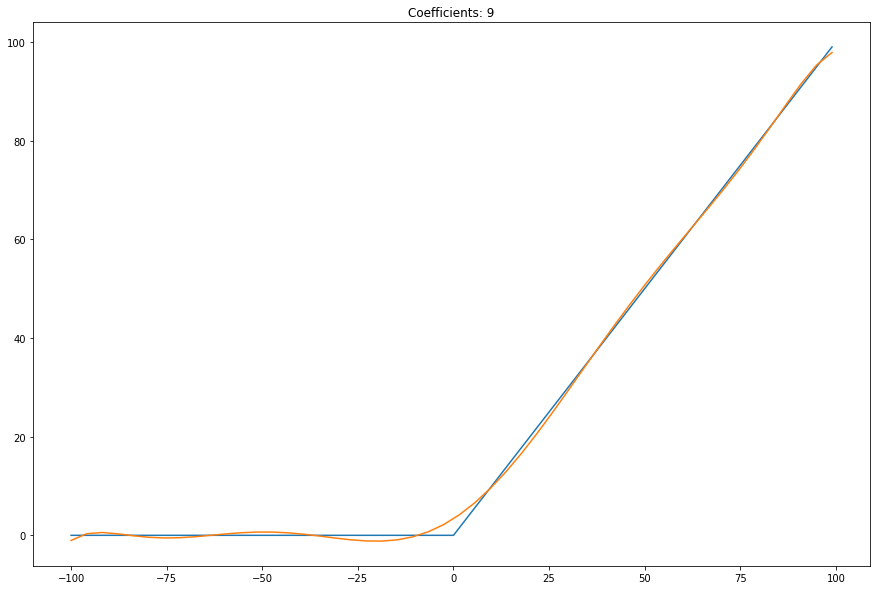

In [11]:
coefficients, x, y = compute_coefficients_ReLU(9, (-100, 100))   
plot_ReLU(coefficients, x, y)

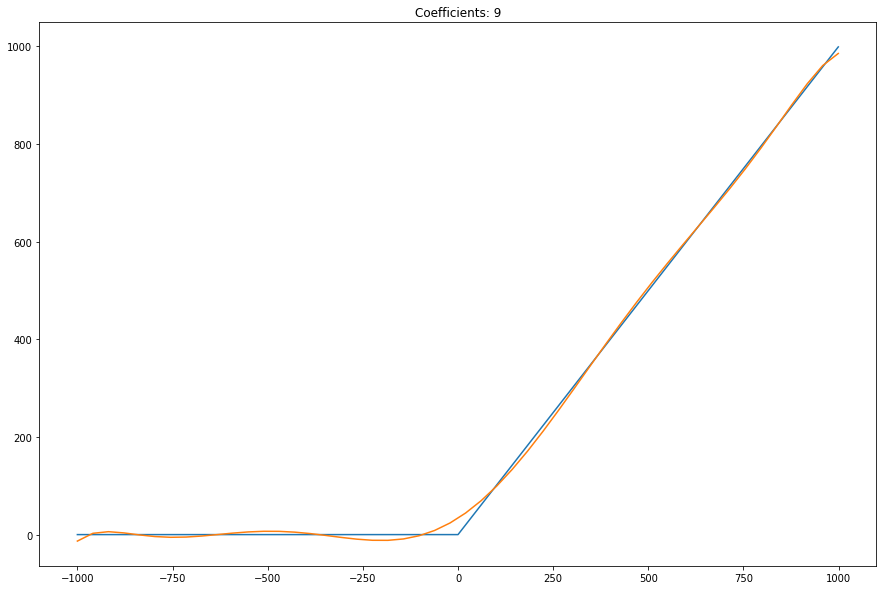

In [12]:
coefficients, x, y = compute_coefficients_ReLU(9, (-1000, 1000))   
plot_ReLU(coefficients, x, y)

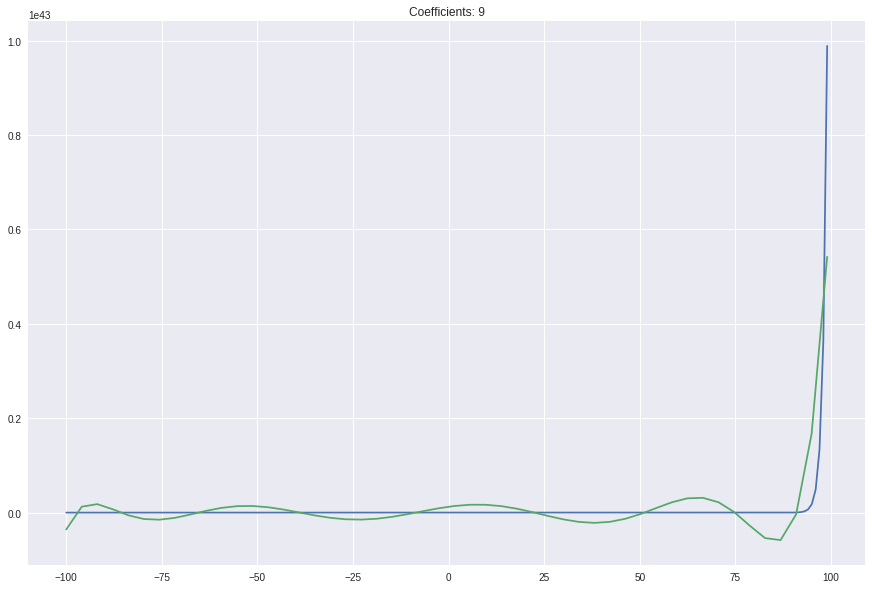

In [74]:
def compute_coefficients_softmax(n_coefficients, domain=(-100, 100)):
    assert domain[0] < 0 and domain[1] > 0
    x = range(domain[0], domain[1])
    y = np.power(np.e, x)
    return np.polyfit(x, y, n_coefficients), x, y


def plot_softmax(coefficients, x, y):
    ReLU = np.poly1d(coefficients)
    x_new = np.linspace(x[0], x[-1], 50)
    y_new = ReLU(x_new)

    pylab.rcParams['figure.figsize'] = (15, 10)
    plt.plot(x,y, x_new, y_new)
    pylab.title('Coefficients: {}'.format(len(coefficients)-1))
    ax = plt.gca()
    fig = plt.gcf()

coefficients, x, y = compute_coefficients_softmax(9, (-100, 100))   
plot_softmax(coefficients, x, y)